In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
!pip install kagglehub

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1


In [8]:
test_path = "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Test-20211018T060000Z-001/Test/Images/"
train_path = "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Training-20211018T055246Z-001/Training/Images/"

In [9]:
import os
os.listdir(train_path)

['GLAUCOMA', 'NORMAL']

In [10]:
import os
os.listdir(test_path)

['normal', 'glaucoma']

In [12]:
train_glaucoma_dir = train_path + "GLAUCOMA"
train_normal_dir = train_path + "NORMAL"
test_glaucoma_dir = test_path + "glaucoma"
test_normal_dir = test_path + "normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")




Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-13-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


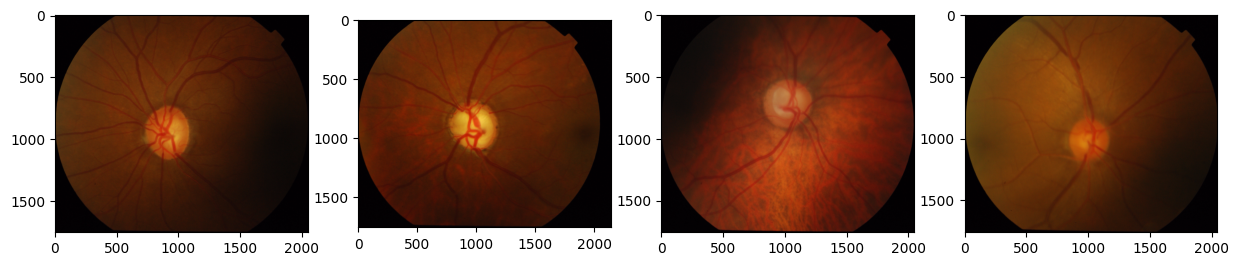


Sample Dristhi normal images:


<ipython-input-13-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


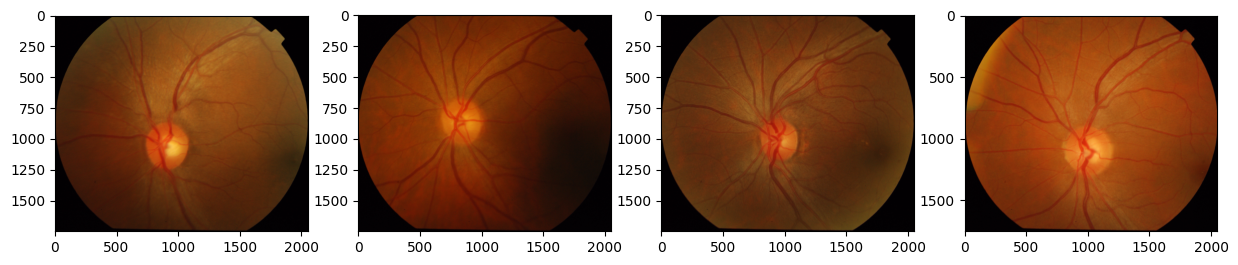

In [13]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shahzaddar/rim-one-dl-images")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1


In [17]:
rim_datasets_path = "/root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1/RIM-ONE_DL_images/partitioned_by_hospital/"


In [18]:
os.listdir(f"{rim_datasets_path}")

['training_set', 'test_set']

In [19]:
train_glaucoma_dir = rim_datasets_path + "training_set/glaucoma"
train_normal_dir = rim_datasets_path + "training_set/normal"
test_glaucoma_dir = rim_datasets_path + "test_set/glaucoma"
test_normal_dir = rim_datasets_path + "test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")


Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-20-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


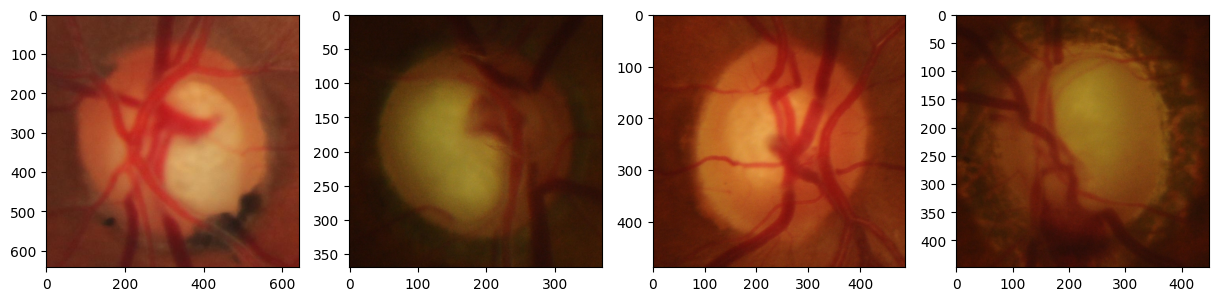


Sample Rim-One normal images:


<ipython-input-20-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


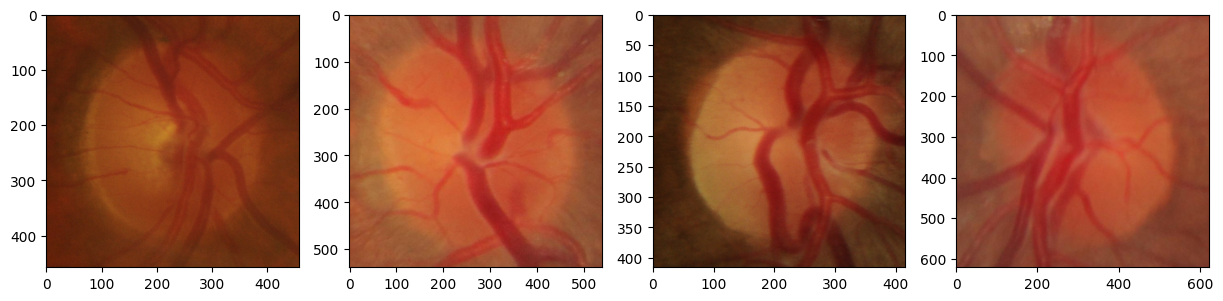

In [20]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("toaharahmanratul/acrima-dataset")

print("Path to dataset files:", path)

100%|██████████| 22.9M/22.9M [00:02<00:00, 9.19MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2


In [22]:
local_path = '/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/'

In [23]:
acrima_glaucoma_dir = local_path + "train/Glaucoma"
acrima_normal_dir = local_path + "train/"+ 'Non Glaucoma'

In [24]:
acrima_glaucoma_dirt = local_path + "test/Glaucoma"
acrima_normal_dirt = local_path + "test/"+ 'Non Glaucoma'

In [25]:
normal_images = os.listdir(acrima_normal_dir)
glaucoma_images = os.listdir(acrima_glaucoma_dir)

Sample glaucoma images:


<ipython-input-26-619b97643226>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


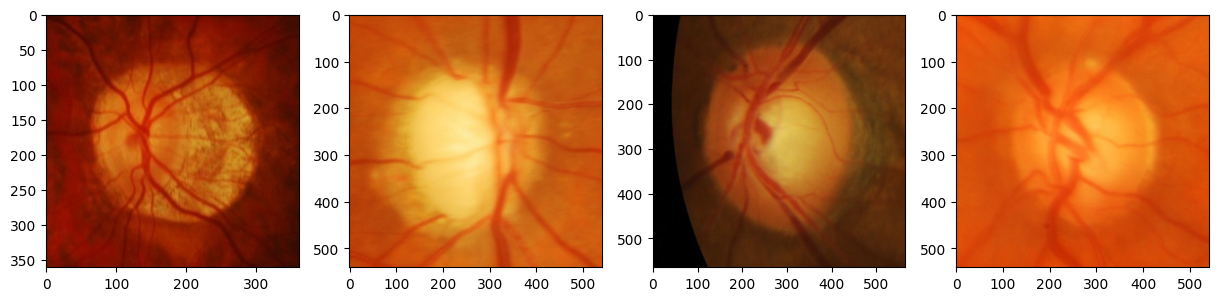


Sample normal images:


<ipython-input-26-619b97643226>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


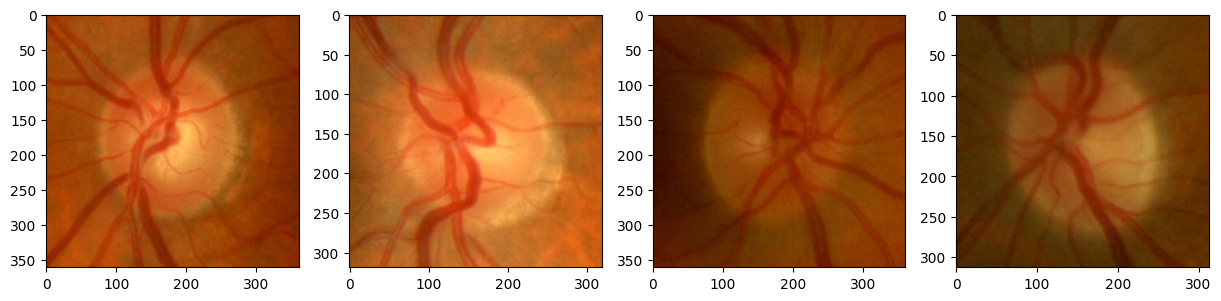

In [26]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(acrima_glaucoma_dir , glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(acrima_normal_dir, normal_images[i - 1])}"))
plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os

# Create the 'combine' directory in your Google Drive
os.makedirs('/content/drive/MyDrive/combine', exist_ok=True)

In [29]:

acrima_glaucoma_dir =  "/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/train/Glaucoma"
acrima_glaucoma_dirt = "/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/test/Glaucoma"
train_glaucoma_dir =  "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Training-20211018T055246Z-001/Training/Images/GLAUCOMA"
test_glaucoma_dir = "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Test-20211018T060000Z-001/Test/Images/glaucoma"
train_glaucoma_dir = "/root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1/RIM-ONE_DL_images/partitioned_by_hospital/training_set/glaucoma"
test_glaucoma_dir =  "/root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1/RIM-ONE_DL_images/partitioned_by_hospital/test_set/glaucoma"

g_dest='/content/drive/MyDrive/combine/glaucoma'
os.mkdir(g_dest)
g_list = [acrima_glaucoma_dir,acrima_glaucoma_dirt,train_glaucoma_dir,test_glaucoma_dir,train_glaucoma_dir,test_glaucoma_dir]

for i in g_list:
  shutil.copytree(i, g_dest, dirs_exist_ok=True)
print(len(os.listdir('/content/drive/MyDrive/combine/glaucoma')))



acrima_normal_dir = "/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/train/"+ 'Non Glaucoma'
acrima_normal_dirt ="/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/test/"+ 'Non Glaucoma'
test_normal_dir = "/root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1/RIM-ONE_DL_images/partitioned_by_hospital/test_set/normal"
train_normal_dir = "/root/.cache/kagglehub/datasets/shahzaddar/rim-one-dl-images/versions/1/RIM-ONE_DL_images/partitioned_by_hospital/training_set/normal"
train_normal_dir2 =  "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Training-20211018T055246Z-001/Training/Images/NORMAL"
test_normal_dir = "/root/.cache/kagglehub/datasets/lokeshsaipureddi/drishtigs-retina-dataset-for-onh-segmentation/versions/1/Test-20211018T060000Z-001/Test/Images/normal"


n_dest='/content/drive/MyDrive/combine/normal'
os.mkdir(n_dest)
n_list=[acrima_normal_dir,acrima_normal_dirt,train_normal_dir,train_normal_dir2,test_normal_dir]
for i in n_list:
  shutil.copytree(i,n_dest, dirs_exist_ok=True)
print(len(os.listdir(n_dest)))


FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/combine/glaucoma'

In [30]:
import pathlib
base_dir = '/content/drive/MyDrive/combine'
base_dir = pathlib.Path(base_dir)


In [31]:

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/combine/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/combine/normal/')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

Total images: 1101
Total number of classes: 2
Total glaucoma images: 568
Total normal images: 535


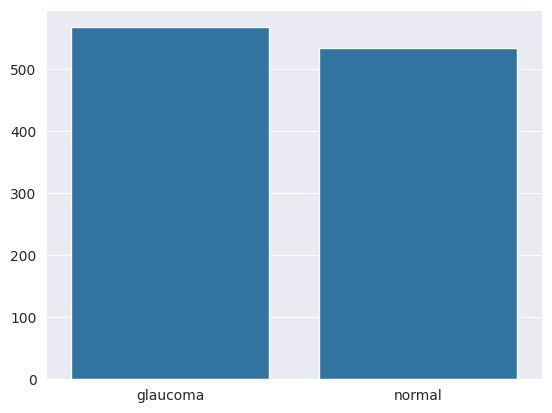

In [32]:
image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

In [33]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
import os

base_ds = '/content/drive/MyDrive/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=16

# Check if the output directory exists and create if not
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

splitfolders.ratio(base_ds, output=output_dir, seed=1321, ratio=(.8,.1,.1), group_prefix=None)

# Verify the creation of the validation folder and its contents
val_dir = os.path.join(output_dir, 'val')
if not os.path.exists(val_dir) or not os.listdir(val_dir):
    raise ValueError(f"Validation data directory '{val_dir}' is missing or empty. Check the splitfolders output.")

# ... (Rest of your code remains the same) ...

Copying files: 1103 files [01:44, 10.51 files/s]


In [34]:
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 882 images belonging to 2 classes.
Found 109 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

# Initialising the CNN
classifier = Sequential()
# Step 1 - Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Step 2 - Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      62,980,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,124,642 (240.80 MB)

 Trainable params: 63,123,618 (240.80 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [37]:
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 150,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 491ms/step - accuracy: 0.5366 - loss: 0.9651 - val_accuracy: 0.1406 - val_loss: 3.3195
Epoch 2/150
23/32 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.3490 - loss: 1.2100

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.3724 - loss: 1.1686 - val_accuracy: 0.0000e+00 - val_loss: 16.2260
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.4865 - loss: 1.1470 - val_accuracy: 0.1406 - val_loss: 9.8295
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5191 - loss: 0.7730 - val_accuracy: 0.8667 - val_loss: 0.3380
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - accuracy: 0.5022 - loss: 0.8107 - val_accuracy: 0.6719 - val_loss: 0.5752
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5284 - loss: 0.7696 - val_accuracy: 0.4222 - val_loss: 1.1350
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 0.6851 - loss: 0.6332 - val_accuracy: 0.8594 - val_loss: 0.7278
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.5189 - loss: 0.8019 - val_accuracy: 0.8222 - val_loss: 0.5028
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.5792 - loss: 0.7138 - val_accurac

In [ ]:
# /content/drive/MyDrive/combine

In [38]:
classifier.save('/content/drive/MyDrive/combine_model/model_cnn.h5')

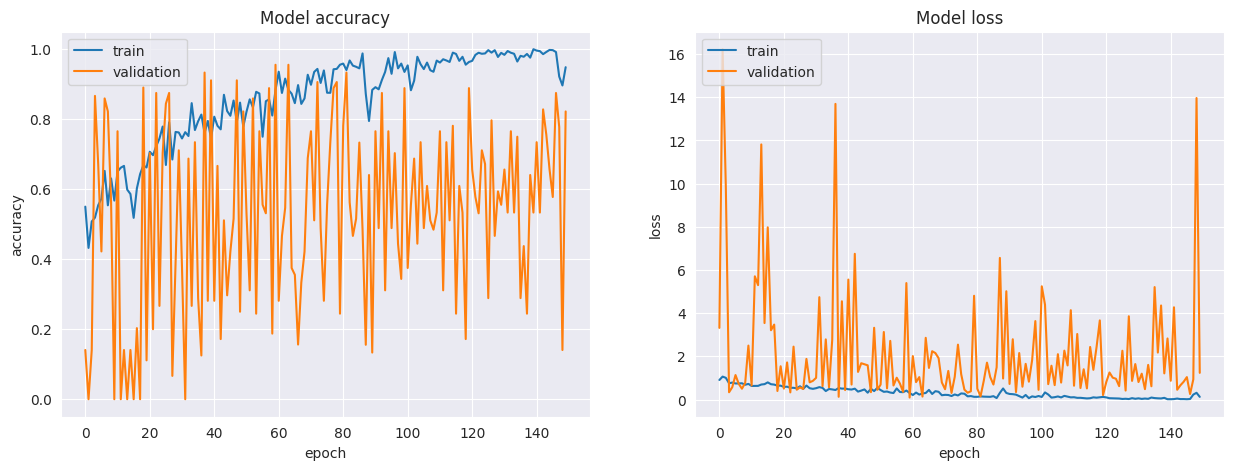

In [40]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

In [41]:
model=load_model('/content/drive/MyDrive/combine_model/model_cnn.h5')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


In [42]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [43]:
test_image = load_img("/root/.cache/kagglehub/datasets/toaharahmanratul/acrima-dataset/versions/2/train/Glaucoma/Im310_g_ACRIMA.jpg", target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Not Glaucoma


In [46]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - accuracy: 0.2236 - loss: 9.2473
Loss: 6.747003078460693 Accuracy: 0.4553571343421936
